# Lab | Unsupervised learning intro (GNOD - part 4)


In [1]:
from bs4 import BeautifulSoup
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import pandas as pd
from pandas import json_normalize
import time
import random
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
#Import CSV Music Features

In [3]:
spotify_data = pd.read_csv('spotify_data.csv')


In [4]:
spotify_data

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.6340,0.000000,0.1160,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.1790,0.000000,0.6890,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.0755,0.000000,0.2710,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.2840,0.000000,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11331,Jambalaya (On The Bayou),John Fogerty,spotify:track:6389cBCT7TWS2Nx0KVsjrk,0.742,0.756,2,-10.121,1,0.0262,0.6240,0.000130,0.0800,0.977,98.568,audio_features,6389cBCT7TWS2Nx0KVsjrk,https://api.spotify.com/v1/tracks/6389cBCT7TWS...,https://api.spotify.com/v1/audio-analysis/6389...,197760,4
11332,Hearts Of Stone,John Fogerty,spotify:track:2uJVtJd1w2N8vg6pJmaNdN,0.412,0.677,6,-10.763,1,0.0376,0.5370,0.006640,0.1210,0.853,205.922,audio_features,2uJVtJd1w2N8vg6pJmaNdN,https://api.spotify.com/v1/tracks/2uJVtJd1w2N8...,https://api.spotify.com/v1/audio-analysis/2uJV...,134000,4
11333,Rock and Roll Girls,John Fogerty,spotify:track:5DeuAlTIDflXOomztXYM5D,0.794,0.730,7,-6.067,1,0.0332,0.0538,0.000832,0.0826,0.767,128.999,audio_features,5DeuAlTIDflXOomztXYM5D,https://api.spotify.com/v1/tracks/5DeuAlTIDflX...,https://api.spotify.com/v1/audio-analysis/5Deu...,206640,4
11334,Rockin' All Over The World,John Fogerty,spotify:track:2X0fwXZpoAbVZdyFVjJOUm,0.539,0.909,2,-6.546,1,0.0423,0.5180,0.000394,0.5580,0.964,130.821,audio_features,2X0fwXZpoAbVZdyFVjJOUm,https://api.spotify.com/v1/tracks/2X0fwXZpoAbV...,https://api.spotify.com/v1/audio-analysis/2X0f...,173000,4


In [5]:
spotify_data.columns


Index(['title', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

In [6]:
X= spotify_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo']]

In [ ]:
#Scale

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#decide number of clusters

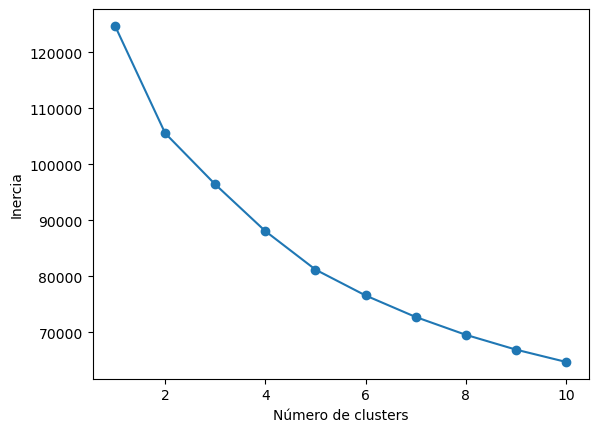

In [14]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()


In [15]:
#build the model

In [16]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X_scaled)


KMeans()

In [17]:
clusters = kmeans.predict(X_scaled)


In [19]:
pd.Series(clusters).value_counts().sort_index()

0     765
1     379
2    1114
3    2478
4     634
5    2687
6    1681
7    1598
dtype: int64

In [ ]:
#add cluster number to the songs

In [22]:
spotify_data['cluster'] = kmeans.predict(X_scaled)

# Muestra el dataframe con la nueva columna 'cluster'
print(spotify_data.head())


                                title              artist  \
0                   Take Me To Church              Hozier   
1         Cooler Than Me - Single Mix         Mike Posner   
2    See You Again (feat. Kali Uchis)  Tyler, The Creator   
3                             Pompeii            Bastille   
4  Hips Don't Lie (feat. Wyclef Jean)             Shakira   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:7dS5EaCoMnN7DzlpT6aRn2         0.566   0.664    4    -5.303   
1  spotify:track:2V4bv1fNWfTcyRJKmej6Sj         0.768   0.820    7    -4.630   
2  spotify:track:7KA4W4McWYRpgf0fWsJZWB         0.558   0.559    6    -9.222   
3  spotify:track:3gbBpTdY8lnQwqxNCcf795         0.679   0.715    9    -6.383   
4  spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V         0.778   0.824   10    -5.892   

   mode  speechiness  acousticness  ...  liveness  valence    tempo  \
0     0       0.0464        0.6340  ...     0.116    0.437  128.945   
1     0   

In [23]:
spotify_data

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,cluster
0,Take Me To Church,Hozier,spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.6340,...,0.1160,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4,4
1,Cooler Than Me - Single Mix,Mike Posner,spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.1790,...,0.6890,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4,5
2,See You Again (feat. Kali Uchis),"Tyler, The Creator",spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.3710,...,0.1090,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4,8
3,Pompeii,Bastille,spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.0755,...,0.2710,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4,9
4,Hips Don't Lie (feat. Wyclef Jean),Shakira,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.2840,...,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11331,Jambalaya (On The Bayou),John Fogerty,spotify:track:6389cBCT7TWS2Nx0KVsjrk,0.742,0.756,2,-10.121,1,0.0262,0.6240,...,0.0800,0.977,98.568,audio_features,6389cBCT7TWS2Nx0KVsjrk,https://api.spotify.com/v1/tracks/6389cBCT7TWS...,https://api.spotify.com/v1/audio-analysis/6389...,197760,4,7
11332,Hearts Of Stone,John Fogerty,spotify:track:2uJVtJd1w2N8vg6pJmaNdN,0.412,0.677,6,-10.763,1,0.0376,0.5370,...,0.1210,0.853,205.922,audio_features,2uJVtJd1w2N8vg6pJmaNdN,https://api.spotify.com/v1/tracks/2uJVtJd1w2N8...,https://api.spotify.com/v1/audio-analysis/2uJV...,134000,4,0
11333,Rock and Roll Girls,John Fogerty,spotify:track:5DeuAlTIDflXOomztXYM5D,0.794,0.730,7,-6.067,1,0.0332,0.0538,...,0.0826,0.767,128.999,audio_features,5DeuAlTIDflXOomztXYM5D,https://api.spotify.com/v1/tracks/5DeuAlTIDflX...,https://api.spotify.com/v1/audio-analysis/5Deu...,206640,4,9
11334,Rockin' All Over The World,John Fogerty,spotify:track:2X0fwXZpoAbVZdyFVjJOUm,0.539,0.909,2,-6.546,1,0.0423,0.5180,...,0.5580,0.964,130.821,audio_features,2X0fwXZpoAbVZdyFVjJOUm,https://api.spotify.com/v1/tracks/2X0fwXZpoAbV...,https://api.spotify.com/v1/audio-analysis/2X0f...,173000,4,5
